In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import analyze as a
import matplotlib.pyplot as plt
import matplotlib.colors as mpcolors
import numpy as np
import paper_plots as pp
import sweep_analyze as sa

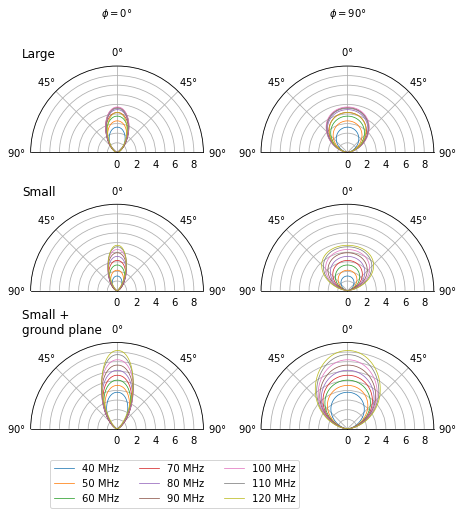

In [6]:
#gain_list, freq, fig, axs = a.polar_beam(gain_list=None, f=None, figsize=(5,3))
fig, axs = a.polar_beam(gain_list=gain_list, f=freq, figsize=(5,3))
#fig.savefig("april_plots/polar_beam.pdf", bbox_inches="tight")

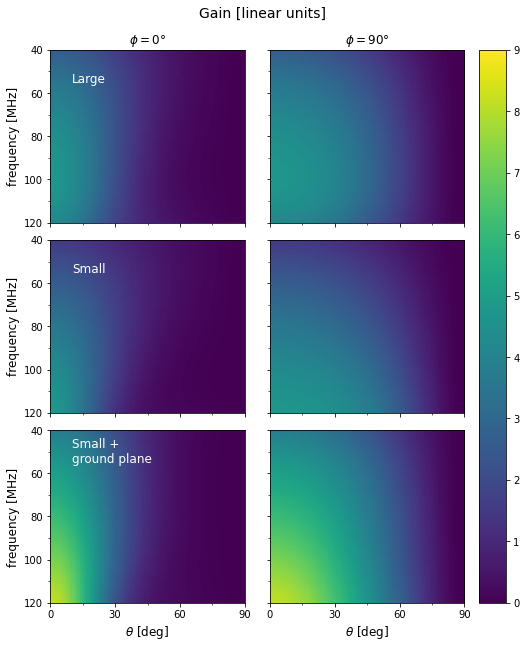

In [7]:
fig, axs = pp.beams(gain_list, freq, False, figsize=(5,3))
#fig.savefig("april_plots/beam_gain.pdf", bbox_inches="tight")

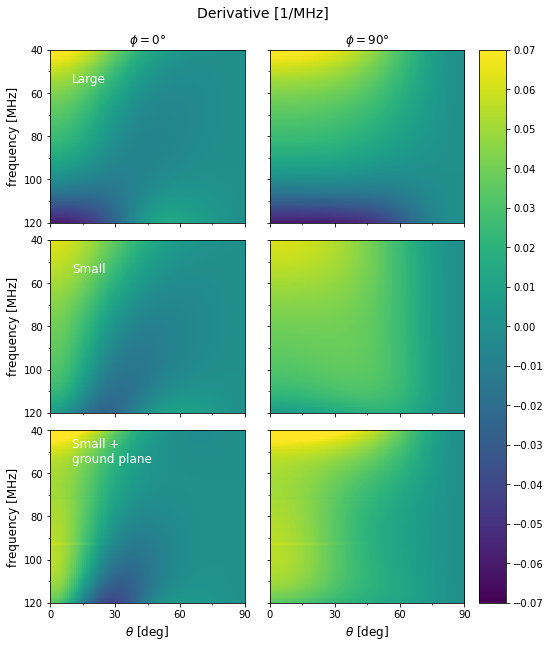

In [8]:
fig, axs = pp.beams(gain_list, freq, True, figsize=(5,3))
#fig.savefig("april_plots/beam_deriv.pdf", bbox_inches="tight")

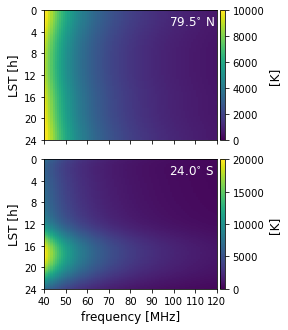

In [10]:
f, t, l = a.get_ftl(0, "sweep", "79.5", ground_plane=False, simulation="old_MIST",)
tsouth = a.get_ftl(0, 'sweep', '-24.0', ground_plane=False, simulation="old_MIST", return_fl=False)
fig, axs = a.plot_temp_3d(f, l, t, tsouth, figsize=(4,16/6))
#fig.savefig('april_plots/waterfall.pdf', bbox_inches='tight')

In [14]:
# largeep = []
# smallep = []
# miniep = []
# for az in [0, 90, 120]:
#     l = sa.rms_sweep(False, "old_MIST", azimuth=az, model="EDGES_polynomial")
#     largeep.append(l)
#     print(f"large {az}")
    
#     s = sa.rms_sweep(False, "new_MIST", azimuth=az, model="EDGES_polynomial")
#     smallep.append(s)
#     print(f"small {az}")
    
#     m = sa.rms_sweep(True, "mini_MIST", azimuth=az, model="EDGES_polynomial")
#     miniep.append(m)
#     print(f"mini {az}")
    
    
# rms_arr_list = largeep + smallep + miniep
# np.save("rms_lat_lst.npy", rms_arr_list)

large 0
small 0
mini 0
large 90
small 90
mini 90
large 120
small 120
mini 120


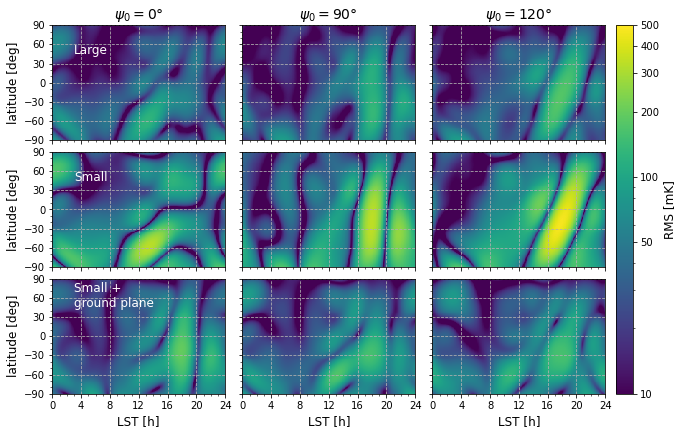

In [19]:
# rms_arr_list = np.load("april_plots/data/rms_lat_lst.npy")
fig, axs = sa.subplot(rms_arr_list, (3,2))
#fig.savefig("april_plots/rms_lat_lst.pdf", bbox_inches="tight")

In [34]:
# d_old_ll, lb_old_ll = sa.get_hist("old_MIST", "linlog")
# d_old_ep, lb_old_ep = sa.get_hist("old_MIST", "edges_polynomial")

# print("----")

# d_new_ll, lb_new_ll = sa.get_hist("new_MIST", "linlog")
# d_new_ep, lb_new_ep = sa.get_hist("new_MIST", "edges_polynomial")

# print("----")

# d_mini_ll, lb_mini_ll = sa.get_hist("mini_MIST", "linlog")
# d_mini_ep, lb_mini_ep = sa.get_hist("mini_MIST", "edges_polynomial")

# np.savez("april_plots/data/hist_data_lbins.npz", d_old_ll=d_old_ll, lb_old_ll=lb_old_ll, d_old_ep=d_old_ep,
#          lb_old_ep=lb_old_ep, d_new_ll=d_new_ll, lb_new_ll=lb_new_ll, d_new_ep=d_new_ep, lb_new_ep=lb_new_ep,
#          d_mini_ll=d_mini_ll, lb_mini_ll=lb_mini_ll, d_mini_ep=d_mini_ep, lb_mini_ep=lb_mini_ep)

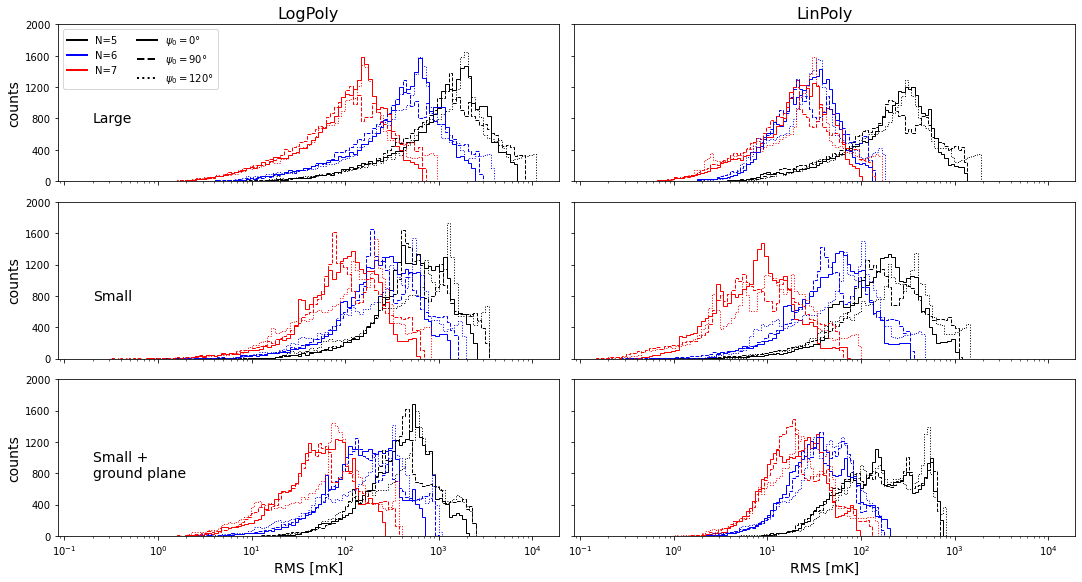

In [55]:
hist_data = np.load("april_plots/data/hist_data_lbins.npz")

fit_models = ["ll", "ep"]
ant_models = ["old", "new", "mini"]

fig, axs = sa.plot_hist()

for i, fm in enumerate(fit_models):
    for j, am in enumerate(ant_models):
        ax = axs[j, i]
        data = hist_data[f"d_{am}_{fm}"]
        lb = hist_data[f"lb_{am}_{fm}"]
        sa.add_hist(ax, data, lb)
        
axs[0,0].text(2e-1, 750, "Large", fontsize=14)
axs[1,0].text(2e-1, 750, "Small", fontsize=14)
axs[2,0].text(2e-1, 750, "Small +\nground plane", fontsize=14)

plt.setp(axs, yticks=np.linspace(0, 2000, num=6))

axs[0,0].set_title("LogPoly", fontsize=16)
axs[0,1].set_title("LinPoly", fontsize=16)
#plt.show()

plt.savefig("april_plots/hist.pdf", bbox_inches="tight")

In [ ]:
miniep0 = sa.rms_sweep(True, "mini_MIST", azimuth=0, model="EDGES_polynomial")

In [ ]:
f, t, l = a.get_ftl(0, loc='sweep', sweep_lat="90.0", ground_plane=False, simulation="old_MIST")

In [ ]:
nrms = a.old_compute_rms(f, t, 40, 120, Nfg_array=[6], model_type="EDGES_polynomial")[0]

In [ ]:
im=plt.imshow(np.log10(miniep0*1000), aspect="auto")
plt.colorbar()
plt.show()

In [ ]:
im=plt.imshow(np.log10(miniep0), aspect="auto")
plt.colorbar()
plt.show()

In [ ]:
im=plt.imshow(np.log10(largeep0), aspect="auto")
plt.colorbar()
plt.show()

In [ ]:
im=plt.imshow(np.log10(largeep0), aspect="auto")
plt.colorbar()
plt.show()

In [ ]:
largeep90 = sa.rms_sweep(False, "old_MIST", azimuth=90, model="EDGES_Polynomial")
print("x")
largeep120 = sa.rms_sweep(False, "old_MIST", azimuth=120, model="EDGES_Polynomial")

In [ ]:
largell = np.load('sweep/rms_large_ll.npy')
largeep = np.load('sweep/rms_large_ep.npy')
smallll = np.load('sweep/rms_small_ll.npy')
smallep = np.load('sweep/rms_small_ep.npy')
gpll = np.load('sweep/rms_gp_ll.npy')
gpep = np.load('sweep/rms_gp_ep.npy')

In [ ]:
fig, axs = pp.histogram(largell, largeep, smallll, smallep, gpll, gpep)

In [ ]:
#fig.savefig('plots/paper_figs/histogram.pdf', bbox_inches='tight')

In [ ]:
np.linspace(-90, 90, 121)[0]

In [ ]:
f, t, l = a.get_ftl(90, "sweep", "79.5", ground_plane=True, simulation="mini_MIST",)

In [ ]:
f

In [ ]:
# rms for all latitudes, 6-term, EDGES polynomial
rms_mini0 = sa.rms_sweep(True, "mini_MIST", azimuth=0)
rms_mini90 = sa.rms_sweep(True, "mini_MIST", azimuth=90)
rms_mini120 = sa.rms_sweep(True, "mini_MIST", azimuth=120)

In [ ]:
az_list = [0, 90, 120]
rms_list = [rms_mini0, rms_mini90, rms_mini120]
fig, axs = pp.plot_basic(1, 3, sharex=True, sharey=True, figsize=None, xmajor=4, xminor=1, ymajor=30, yminor=10,
                        dx=0.8, dy=0.8, hspace=1.1, vspace=1.1)
for i, ax in enumerate(axs):
    im = ax.imshow(rms_list[i]*1000, aspect="auto", extent=[0, 24, -90, 90], interpolation="none",
                   norm=mpcolors.LogNorm())
    im.set_clim(10, 500)
    ax.grid(linestyle="--")
    ax.set_xlabel("LST [h]")
    ax.set_title("$\\psi_0={:d} \\degree$".format(az_list[i]))
axs[0].set_ylabel("Latitude [deg]")
cax = fig.add_axes([2.58, 0, 0.04, 0.8])
cticks = [10, 50, 200, 300, 400, 500]
cbar = fig.colorbar(im, cax=cax, ticks=cticks)
cbar.set_ticklabels([str(t) for t in cticks])
cbar.set_label("RMS [mK]")

In [ ]:
#rms_arr_list = np.load('sweep/sweep_rms.npz')

In [ ]:
for k in rms_arr_list:
    print(k)

In [ ]:
fig, axs = sa.subplot(rms_arr_list, (3,2))

In [ ]:
#fig.savefig('plots/paper_figs/rms_sweep.pdf', bbox_inches='tight')

In [ ]:
rms_n = np.empty((3, 2, 3))  # ant, model, az
for i, az in enumerate([0, 90, 120]):
    f, t, l = a.get_ftl(az, "sweep", "79.5", ground_plane=False, simulation="old_MIST")
    rms,_ = a.compute_rms(f, t, model_type="EDGES_Polynomial")
    rms_n[0, 1, i] = rms[0] * 100
    rms,_ = a.compute_rms(f, t, model_type="LINLOG")
    rms_n[0, 0, i] = rms[0] * 100
    
    f, t, l = a.get_ftl(az, "sweep", "79.5", ground_plane=False, simulation="new_MIST")
    rms,_ = a.compute_rms(f, t, model_type="EDGES_Polynomial")
    rms_n[1, 1, i] = rms[0] * 100
    rms, _= a.compute_rms(f, t, model_type="LINLOG")
    rms_n[1, 0, i] = rms[0] * 100
    
    f, t, l = a.get_ftl(az, "sweep", "79.5", ground_plane=True, simulation="mini_MIST")
    rms,_ = a.compute_rms(f, t, model_type="EDGES_Polynomial")
    rms_n[2, 1, i] = rms[0] * 100
    rms,_ = a.compute_rms(f, t, model_type="LINLOG")
    rms_n[2, 0, i] = rms[0] * 100
    
    
#rms_n = np.load('result_files/rms_snapshots_MARS.npy')

In [ ]:
f

In [ ]:
fig, axs = pp.plot_rms(rms_n, (10,5))

In [ ]:
fig.savefig('plots/paper_figs/rms_mars.pdf', bbox_inches='tight')

In [ ]:
#rms_s = np.load('result_files/rms_snapshots_south.npy')

In [ ]:
fig, axs = pp.plot_rms(rms_s, (10,5), north=False)

In [ ]:
fig.savefig('plots/paper_figs/rms_south.pdf', bbox_inches='tight')

In [ ]:
#XXX: invert axis
fig, axs = sa.rmsvslat()

In [ ]:
fig.savefig('plots/paper_figs/rms_vs_lat.pdf', bbox_inches='tight')

In [ ]:
# rms_fg = np.load('result_files/rmsvslat_24h_foregrounds.npy')
# rms_gauss40 = np.load('result_files/rmsvslat_24h_gauss40.npy') 
# rms_gauss80 = np.load('result_files/rmsvslat_24h_gauss80.npy')
# rms_gauss120 = np.load('result_files/rmsvslat_24h_gauss120.npy')
# rms_edges = np.load('result_files/rmsvslat_24h_edges.npy')

In [ ]:
fig, axs = sa.rmsvslat_21cm(rms_fg, rms_gauss40, rms_gauss80, rms_gauss120, rms_edges)

In [ ]:
#rms_arr_super_MARS = np.load('result_files/lst2d_mars.npy')

In [ ]:
fig, axs = a.subplot_LSTbins(rms_arr_super_MARS, 1, 120)

In [ ]:
fig.savefig('plots/paper_figs/lstbin_mars.pdf', bbox_inches='tight')

In [ ]:
#rms_arr_super_south = np.load('result_files/lst2d_south.npy')

In [ ]:
fig, axs = a.subplot_LSTbins(rms_arr_super_south, 10, 500)

In [ ]:
#fig.savefig('plots/paper_figs/lstbin_south.pdf', bbox_inches='tight')

In [ ]:
# gauss40 = np.load('result_files/gauss40.npy')
# gauss80 = np.load('result_files/gauss80.npy')
# gauss120 = np.load('result_files/gauss120.npy')
# edges = np.load('result_files/edges_ratios.npy')

In [ ]:
fig = a.plot_gauss_edges(gauss40, gauss80, gauss120, edges)

In [ ]:
#fig.savefig('plots/paper_figs/mock_signal_ratios_north0.pdf', bbox_inches='tight')

In [ ]:
fig = a.plot_gauss_edges(gauss40, gauss80, gauss120, edges, north=False)

In [ ]:
#fig.savefig('plots/paper_figs/mock_signal_ratios_south0.pdf', bbox_inches='tight')